<a href="https://colab.research.google.com/github/arechigajd/food_sales_predictions/blob/main/foodsoldstoresML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import pandas as pd
sales_predict = '/content/sales_predictions.csv'

In [136]:
future_sales_df = pd.read_csv(sales_predict)
future_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [137]:
future_sales_df.shape

(8523, 12)

In [138]:
future_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [139]:
future_sales_df.duplicated().sum()

0

In [140]:
future_sales_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [141]:
future_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
future_sales_df[['Item_Weight', 'Item_Outlet_Sales']].sample(15)

,Item_Weight,Item_Outlet_Sales
6522,12.150,710.4086
117,7.485,2542.0244
144,14.000,905.4880
7389,16.500,227.7036
4595,5.780,5273.1360
4864,18.500,4029.4216
3912,12.850,3036.0480
2218,10.800,3813.7024
1023,20.100,2418.1856
3491,NaN,2109.2544


In [143]:
future_sales_df.drop(columns = 'Item_Weight', inplace = True)
# item weight is now irrelevant; it has 415 unique numbers, a significant amount of missing
# (cont.) data, and after sample() shows no correlation to how well given items sells
future_sales_df.isna().sum() 

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [144]:
future_sales_df[['Outlet_Size', 'Item_Outlet_Sales']].sample(15)

,Outlet_Size,Item_Outlet_Sales
8088,Medium,2346.9450
343,NaN,2716.4640
1593,NaN,4514.1240
4862,Medium,1043.9744
6211,Medium,539.2980
5679,Medium,2596.6200
1876,Small,4442.2176
5207,Small,1298.3100
3309,Small,1917.5040
8358,Small,121.1756


In [145]:
future_sales_df.drop(columns = 'Outlet_Size', inplace = True)
# unique numbers is only three for the column Outlet_Size, however it has a significant number of missing
# (cont.) data and after sample() it shows no correlation to how well an items sale; for those reasons
# (cont.) it will be deleted
future_sales_df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [146]:
future_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [147]:
future_sales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [148]:
future_sales_df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [149]:
future_sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [150]:
future_sales_df['Item_Fat_Content'] = future_sales_df['Item_Fat_Content'].replace('LF', 'Low Fat')
future_sales_df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [151]:
future_sales_df['Item_Fat_Content'] = future_sales_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
future_sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [152]:
future_sales_df['Item_Fat_Content'] = future_sales_df['Item_Fat_Content'].replace('reg', 'Regular')
future_sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [153]:
future_sales_df.nunique()

Item_Identifier              1559
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [154]:
future_sales_df['Item_Type'].duplicated().sum()

8507

In [155]:
future_sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [156]:
future_sales_df['Outlet_Identifier'].duplicated().sum()

8513

In [157]:
future_sales_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [158]:
future_sales_df['Outlet_Establishment_Year'].duplicated().sum()

8514

In [159]:
future_sales_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [160]:
future_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [161]:
future_sales_df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [162]:
future_sales_df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [163]:
future_sales_df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [164]:
future_sales_df['Outlet_Establishment_Year'] =future_sales_df['Outlet_Establishment_Year'].astype(object)

In [165]:
future_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), object(7)
memory usage: 666.0+ KB


In [166]:
future_sales_df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [167]:
future_sales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

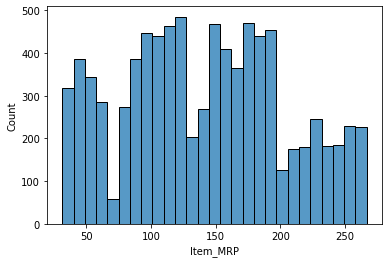

In [169]:
sns.histplot(data = future_sales_df, x = 'Item_MRP');
# this histogram shows how the maximum retail prices are distributed among the items for sale 

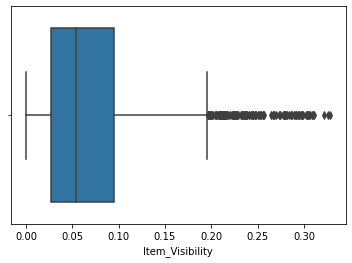

In [170]:
sns.boxplot(data = future_sales_df, x = 'Item_Visibility');
# shows how items are visible throughout the stores

In [171]:
fscorr = future_sales_df.corr()

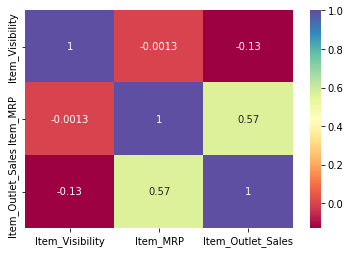

In [172]:
sns.heatmap(fscorr, cmap = 'Spectral', annot = True);
# there is moderate (positive) correlation between Item_MRP and Item_Outlet_Sales. There is essentially no correlation between Item_Visibility and Item_MRP. There is extremely low negative correlation between Item_Visibility and Item_Outlet_Sales.

In [173]:
# import libraries
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [174]:
print(future_sales_df.info(), '\n')
print(future_sales_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), object(7)
memory usage: 666.0+ KB
None 

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outle

In [175]:
future_sales_df.duplicated().sum()

0

In [176]:
future_sales_df.describe()

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914
std,0.051598,62.275067,1706.499616
min,0.000000,31.290000,33.290000
25%,0.026989,93.826500,834.247400
50%,0.053931,143.012800,1794.331000
75%,0.094585,185.643700,3101.296400
max,0.328391,266.888400,13086.964800


In [177]:
future_sales_df.drop(columns=['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)
future_sales_df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052


Features: Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Location_Type, Outlet_Type.
Target: Item_Outlet_Sales.

Note: Item_Identifier, Outlet_Identifier, and Outlet_Establishment_Year have been dropped to prevent decrease in model performance.

In [178]:
X = future_sales_df.drop('Item_Outlet_Sales', axis=1)
y = future_sales_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [179]:
fscat_selector = make_column_selector(dtype_include='object')
fsnum_selector = make_column_selector(dtype_include='number')

In [180]:
# no missing values but good to have just in case
fsfreq_imputer = SimpleImputer(strategy='most_frequent')
fsmean_imputer = SimpleImputer(strategy='mean')

fsscaler = StandardScaler()

fsohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [181]:
fsnumeric_pipe = make_pipeline(fsmean_imputer, fsscaler)
fsnumeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [182]:
fscategorical_pipe = make_pipeline(fsfreq_imputer, fsohe)
fscategorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [183]:
fsnumber_tuple = (fsnumeric_pipe, fsnum_selector)
fscategory_tuple = (fscategorical_pipe, fscat_selector)

fspreprocessor = make_column_transformer(fsnumber_tuple, fscategory_tuple)
fspreprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7e8dc39990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7e8dc39810>)])

In [184]:
fspreprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7e8dc39990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7e8dc39810>)])

In [185]:
X_train_processed = fspreprocessor.transform(X_train)
X_test_processed = fspreprocessor.transform(X_test)
# dataset prepared for machine learning

In [186]:
# check work
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 27)




array([[-0.71277507,  1.82810922,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [187]:
from sklearn.linear_model import LinearRegression
fsreg = LinearRegression()

In [188]:
fsreg_pipe = make_pipeline(fsscaler, fsreg)

In [189]:
fsreg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [190]:
# fspredictions = fsreg_pipe.predict(X_test_processed)

In [191]:
# fsprediction_df = X_test.copy()
# fsprediction_df['Item_Outlet_Sales'] = y_test
# fsprediction_df['Predicted_Sales'] = fspredictions
# fsprediction_df['Error'] = fspredictions - y_test
# fsprediction_df.head()

In [192]:
# fspredictions[:5]

In [193]:
fstrain_pred = fsreg_pipe.predict(X_train_processed)
fstest_pred = fsreg_pipe.predict(X_test_processed)

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [195]:
fstrain_r2 = r2_score(y_train, fstrain_pred)
fstest_r2 = r2_score(y_test, fstest_pred)

print(f'Model Training R2: {fstrain_r2}')
print(f'Model Testing R2: {fstest_r2}')

Model Training R2: 0.5603506933797917
Model Testing R2: 0.5653911307457478


In [196]:
fstrain_RMSE = np.sqrt(np.mean(np.abs(fstrain_pred - y_train)**2))
fstest_RMSE = np.sqrt(np.mean(np.abs(fstest_pred - y_test)**2))

print(f'Model Training RMSE: {fstrain_RMSE}')
print(f'Model Testing RMSE: {fstest_RMSE}')

Model Training RMSE: 1140.6676327784187
Model Testing RMSE: 1095.0232871276364


In [197]:
from sklearn.tree import DecisionTreeRegressor

In [198]:
fsdec_tree = DecisionTreeRegressor(random_state = 42)

In [199]:
fsdec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [200]:
fsdttrain_preds = fsdec_tree.predict(X_train_processed)
fsdttest_preds = fsdec_tree.predict(X_test_processed)

In [203]:
fsdttrain_score = fsdec_tree.score(X_train_processed, y_train)
fsdttest_score = fsdec_tree.score(X_test_processed, y_test)
print(fsdttrain_score)
print(fsdttest_score)

1.0
0.17568425820003153


In [204]:
fsdec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [205]:
fsdec_tree.get_depth()

40

In [206]:
fsdec_tree.get_n_leaves()

6264

In [207]:
fsdec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
fsdec_tree_2.fit(X_train_processed, y_train)
fsdttrain_2_score = fsdec_tree_2.score(X_train_processed, y_train)
fsdttest_2_score = fsdec_tree_2.score(X_test_processed, y_test)
print(fsdttrain_2_score)
print(fsdttest_2_score)

0.43164096170474664
0.4337775044707164


In [208]:
fsdec_tree_20 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
fsdec_tree_20.fit(X_train_processed, y_train)
fsdttrain_20_score = fsdec_tree_20.score(X_train_processed, y_train)
fsdttest_20_score = fsdec_tree_20.score(X_test_processed, y_test)
print(fsdttrain_20_score)
print(fsdttest_20_score)

0.9336556440244921
0.24682978264042887


In [210]:
fsdtdepths = list(range(2, 40)) 

fsdtscores = pd.DataFrame(index=fsdtdepths, columns=['Test Score','Train Score'])
for depth in fsdtdepths:
    fsdec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    fsdec_tree.fit(X_train_processed, y_train)
    train_score = fsdec_tree.score(X_train_processed, y_train)
    test_score = fsdec_tree.score(X_test_processed, y_test)
    fsdtscores.loc[depth, 'Train Score'] = train_score
    fsdtscores.loc[depth, 'Test Score'] = test_score

Text(0, 0.5, 'R2')

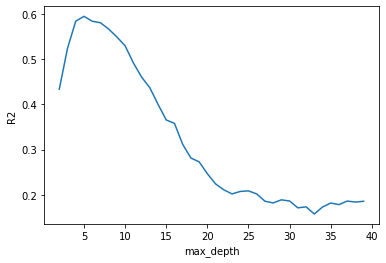

In [212]:
plt.plot(fsdtdepths, fsdtscores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2')

In [213]:
fsdtsorted_scores = fsdtscores.sort_values(by='Test Score', ascending=False)
fsdtsorted_scores.head()

,Test Score,Train Score
5,0.594747,0.603925
4,0.584005,0.582625
6,0.583905,0.614877
7,0.580576,0.625963
8,0.566699,0.641355


In [215]:
fsdec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
fsdec_tree_5.fit(X_train_processed, y_train)
fsdttrain_5_score = fsdec_tree_5.score(X_train_processed, y_train)
fsdttest_5_score = fsdec_tree_5.score(X_test_processed, y_test)
print(fsdttrain_5_score)
print(fsdttest_5_score)

0.6039254897160836
0.5947470502499344


In [217]:
fsdttrain_5_preds = fsdec_tree_5.predict(X_train_processed)
fsdttest_5_preds = fsdec_tree_5.predict(X_test_processed)

In [218]:
fsdttrain_RMSE = np.sqrt(np.mean(np.abs(fsdttrain_5_preds - y_train)**2))
fsdttest_RMSE = np.sqrt(np.mean(np.abs(fsdttest_5_preds - y_test)**2))

print(f'Model Training RMSE: {fsdttrain_RMSE}')
print(f'Model Testing RMSE: {fsdttest_RMSE}')

Model Training RMSE: 1082.6656773340972
Model Testing RMSE: 1057.3947626960721


Overall I recommend the regression tree model (decision tree). It scored higher on the R2 metric and it's RMSE metric shows a smaller gap between the training set and testing set of data. These metrics in comparison with the linear regression model show that the regression tree model will perform better.